In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
%run ./functions_gandalf_wintermute.py
%run ./engine_gandalf_wintermute.py
%run ./Candlesticks_Lib.ipynb

5.3.1


In [3]:
def info_simboli():
    import os
    import numpy as np
    import pandas as pd

    valori=pd.read_csv("Markets_Specifications_Live.csv",sep=",",encoding='cp1252')
    valori.reset_index(inplace=True)
    valori.Exchange_Time=np.where(valori.Exchange_Time==-6,"CST6CDT",valori.Exchange_Time)
    valori.Exchange_Time=np.where(valori.Exchange_Time=="-5","EST5EDT",valori.Exchange_Time)
    valori.Exchange_Time=np.where(valori.Exchange_Time=="1","CET",valori.Exchange_Time)
    valori["Simbolo"]=valori.Physical
    valori=valori[valori.Exchange!="ICE "]
    return valori

valori=info_simboli()
valori=valori.dropna()
valori

,index,SecurityName,Exchange Code,Physical,Underlying Future,MarketTypeName,Exchange,BigPointValue,Unit,Margins,Regular Open,Regular Close,Custom Open,Custom Close,Tick,Cost,AMP_simb,Exchange_Time,TT_Code,Simbolo
0,0,Australian Dollar,6A,AD,Australian Dollar,Currencies,CME,100000,0.00,2000,1700,1600,720,1400,0.000100,25.0,DA6,CST6CDT,6A,AD
2,2,British Pound,6B,BP,British Pound,Currencies,CME,62500,0.00,2500,1700,1600,720,1400,0.000100,25.0,BP6,CST6CDT,6B,BP
3,3,Crude Oil,CL,CL,Crude Oil,Energies,CME,1000,0.10,6000,1800,1700,900,1430,0.010000,50.0,CLE,EST5EDT,CL,CL
4,4,Euro FX,6E,EC,Euro FX,Currencies,CME,125000,0.00,3000,1700,1600,720,1400,0.000100,25.0,EU6,CST6CDT,6E,EC
6,6,E-mini S&P 500,ES,ES,E-mini S&P 500,Stock Indices,CME,50,0.10,12000,1700,1600,830,1515,0.250000,25.0,EP,CST6CDT,ES,ES
7,7,DAX Futures,FDAX,FDAX,DAX Futures,Stock Indices,EUREX,25,0.20,30000,110,2200,800,2200,0.500000,50.0,FDX,CET,FDAX,FDAX
8,8,EURO STOXX 50 Index,FESX,FESX,EURO STOXX 50 Index,Stock Indices,EUREX,5,0.00,3000,110,2200,800,2200,0.500000,20.0,DSX,CET,FESX,FESX
9,9,Euro Bund,FGBL,FGBL,Euro Bund,Fixed Income,EUREX,1000,0.00,2400,110,2200,800,2200,0.010000,20.0,DB,CET,FGBL,FGBL
10,10,Gold,GC,GC,Gold,Metals,CME,100,0.10,8500,1800,1700,800,1500,0.100000,60.0,GCE,EST5EDT,GC,GC
11,11,Copper,HG,HG,Copper,Metals,CME,25000,0.00,7500,1800,1700,800,1500,0.050000,60.0,CPE,EST5EDT,HG,HG


## Carico serie storica (dove eseguo la scansione dei pattern)

In [4]:
dir_history=(r"C:\Users\Drako\TS_API")


SIMBOLO="EC"
select = valori.loc[valori.Physical== SIMBOLO]

bigpointvalue=int(select.BigPointValue)
tick=float(select.Tick)
costi=int(select.Cost)
file_name="@"+SIMBOLO+"_5Minute_2022-07-12.csv"
utc_offset = select.Exchange_Time.values[0]
type_session = 1 #0 resample standard session #1 resaple custom session
resample_tf = "60min"
IS = "2012-01-01"
OOS = "2022-05-01"


custom_session_start = "0"+str(select["Custom Open"].values[0]) #4 cifre
custom_session_stop = str(select["Custom Close"].values[0]) #4 cifre

time_frame ="D"
dataset = carica_storico(file_name,utc_offset,type_session,resample_tf,IS,OOS,custom_session_start,custom_session_stop,0,0)
dataset = dataset.resample(time_frame).agg({'open': 'first','high': 'max','low':'min','close':'last','volume':'sum'}).dropna()


Caricato storico
Resample dei dati


## Converto il dataset da Pandas a Numpy

In [5]:
convert_pd_df_to_np_array=pandas_df_to_numpy_array(dataset)

np_open , np_high , np_low , np_close = convert_pd_df_to_np_array[0] , convert_pd_df_to_np_array[1] , convert_pd_df_to_np_array[2] , convert_pd_df_to_np_array[3]

## Scansione mercato

In [7]:
n_days=3
lookback=10
fraction_movement=0.01

search=search_pattern(np_open,np_high,np_low,np_close,n_days,lookback,fraction_movement)
up_ls , down_ls , position_up , position_down = search[0] , search[1] , search[2] , search[3]

print("N:",len(up_ls),"patterns lato Long")
print("N:",len(down_ls),"patterns lato Short")

N: 276 patterns lato Long
N: 298 patterns lato Short


## Seleziono Mercati Aggiuntivi

In [8]:
valori2=valori.Physical#[valori.MarketTypeName == "Currencies"]
valori2

0       AD
2       BP
3       CL
4       EC
6       ES
7     FDAX
8     FESX
9     FGBL
10      GC
11      HG
12      HO
13      JY
15      NG
16      NQ
17       S
19      SI
20     RTY
21      TY
22      US
23       W
24      YM
25      LH
26      LC
27      RB
28      PL
30       C
Name: Physical, dtype: object

# Backtest patterns

In [10]:
big_results_long=pd.DataFrame()
big_results_short=pd.DataFrame()
dir_history=(r"C:\Users\Drako\TS_API")


for simb in tqdm(valori2):
    simbolo=simb
    
    select = valori.loc[valori.Physical== simbolo]

    bigpointvalue=int(select.BigPointValue)
    tick=float(select.Tick)
    costi=int(select.Cost)
    file_name=check_history_name(simbolo,dir_history)
    utc_offset = select.Exchange_Time.values[0]
    type_session = 1 #0 resample standard session #1 resaple custom session
    resample_tf = "60min"
    IS = "2012-01-01"
    OOS = "2022-05-01"


    custom_session_start = "0"+str(select["Custom Open"].values[0]) #4 cifre
    custom_session_stop = str(select["Custom Close"].values[0]) #4 cifre

    time_frame ="D"
    dataset = carica_storico(file_name,utc_offset,type_session,resample_tf,IS,OOS,custom_session_start,custom_session_stop,0,0)
    dataset = dataset.resample(time_frame).agg({'open': 'first','high': 'max','low':'min','close':'last','volume':'sum'}).dropna()

    convert_pd_df_to_np_array=pandas_df_to_numpy_array(dataset)

    np_open , np_high , np_low , np_close = convert_pd_df_to_np_array[0] , convert_pd_df_to_np_array[1] , convert_pd_df_to_np_array[2] , convert_pd_df_to_np_array[3]

    pct_accepted=70 # 70 / 75

    backtest_pattern=backtest(pct_accepted,bigpointvalue)

    big_res_long , big_data_long , big_res_short , big_data_short = backtest_pattern
    

    df_res_long=Results_Patterns(big_res_long,"Profit","long")

    df_res_long["simbolo"]=simbolo
    
    big_results_long=pd.concat([big_results_long,df_res_long])
    
    
    df_res_short=Results_Patterns(big_res_short,"Profit","short")

    df_res_short["simbolo"]=simbolo
    
    big_results_short=pd.concat([big_results_short,df_res_short])

  0%|          | 0/26 [00:00<?, ?it/s]

Caricato storico
Resample dei dati
BackTest Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

BackTest Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Risultati Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

Risultati Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Caricato storico
Resample dei dati
BackTest Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

BackTest Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Risultati Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

Risultati Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Caricato storico
Resample dei dati
BackTest Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

BackTest Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Risultati Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

Risultati Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Caricato storico
Resample dei dati
BackTest Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

BackTest Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Risultati Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

Risultati Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Caricato storico
Resample dei dati
BackTest Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

BackTest Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Risultati Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

Risultati Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Caricato storico
Resample dei dati
BackTest Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

BackTest Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Risultati Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

Risultati Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Caricato storico
Resample dei dati
BackTest Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

BackTest Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Risultati Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

Risultati Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Caricato storico
Resample dei dati
BackTest Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

BackTest Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Risultati Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

Risultati Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Caricato storico
Resample dei dati
BackTest Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

BackTest Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Risultati Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

Risultati Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Caricato storico
Resample dei dati
BackTest Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

BackTest Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Risultati Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

Risultati Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Caricato storico
Resample dei dati
BackTest Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

BackTest Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Risultati Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

Risultati Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Caricato storico
Resample dei dati
BackTest Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

BackTest Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Risultati Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

Risultati Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Caricato storico
Resample dei dati
BackTest Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

BackTest Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Risultati Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

Risultati Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Caricato storico
Resample dei dati
BackTest Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

BackTest Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Risultati Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

Risultati Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Caricato storico
Resample dei dati
BackTest Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

BackTest Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Risultati Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

Risultati Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Caricato storico
Resample dei dati
BackTest Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

BackTest Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Risultati Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

Risultati Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Caricato storico
Resample dei dati
BackTest Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

BackTest Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Risultati Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

Risultati Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Caricato storico
Resample dei dati
BackTest Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

BackTest Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Risultati Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

Risultati Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Caricato storico
Resample dei dati
BackTest Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

BackTest Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Risultati Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

Risultati Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Caricato storico
Resample dei dati
BackTest Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

BackTest Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Risultati Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

Risultati Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Caricato storico
Resample dei dati
BackTest Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

BackTest Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Risultati Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

Risultati Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Caricato storico
Resample dei dati
BackTest Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

BackTest Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Risultati Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

Risultati Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Caricato storico
Resample dei dati
BackTest Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

BackTest Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Risultati Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

Risultati Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Caricato storico
Resample dei dati
BackTest Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

BackTest Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Risultati Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

Risultati Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Caricato storico
Resample dei dati
BackTest Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

BackTest Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Risultati Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

Risultati Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Caricato storico
Resample dei dati
BackTest Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

BackTest Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

Risultati Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

Risultati Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

# Filtri Base

In [11]:
N_min_mercati = 5
N_min_Operations = 40
Min_Sharpe = 0.8

# Seleziona se Long o Short

In [12]:
df_PTN=big_results_long[(big_results_long.Operations>N_min_Operations)&(big_results_long.Sharpe>=Min_Sharpe)]
direzione="long"

In [72]:
df_PTN=big_results_short[(big_results_short.Operations>N_min_Operations)&(big_results_short.Sharpe>=Min_Sharpe)]
direzione="short"

In [13]:

ls_patt=df_PTN["Ptn_N°"]
from collections import Counter
ls = Counter(ls_patt)
conta=ls.most_common()
ls_cnt=[]
for e in conta:
    y=df_PTN[df_PTN["Ptn_N°"]==e[0]].groupby("simbolo").sum().index
    if (SIMBOLO in y) & (len(y)>=N_min_mercati):
        x=len(y)
        ls_cnt.append([e[0],x])
        
result_pattern=pd.DataFrame(ls_cnt)
result_pattern.columns=(["n_pattern","n_mercati"])
result_pattern["direzione"]=direzione
df_PTN=df_PTN[df_PTN["Ptn_N°"].isin(result_pattern.n_pattern.to_list())]
result_pattern

,n_pattern,n_mercati,direzione
0,170,21,long
1,27,21,long
2,173,21,long
3,255,19,long
4,166,19,long
5,30,21,long
6,66,18,long
7,146,19,long
8,233,20,long
9,272,17,long


In [14]:
df_PTN[df_PTN["Ptn_N°"]==170]

,Profit,MaxDD,Operations,AverageTrade,ProfitFactor,PctWin,Sharpe,Kestner_Ratio,Exit,Ptn_N°,simbolo
0,17885.000,-4745.00,69,259.20,2.06,65.22,4.56,0.40,Ext_3_bar,170,AD
0,12750.000,-4530.00,69,184.78,1.87,60.87,4.95,0.26,Ext_2_bar,170,AD
0,3170.000,-2370.00,67,47.31,1.31,59.70,3.46,0.08,Ext_1_bar,170,AD
0,7931.250,-3881.25,73,108.65,1.44,56.16,3.09,0.24,Ext_3_bar,170,BP
0,3143.750,-2993.75,73,43.07,1.20,52.05,2.30,0.08,Ext_2_bar,170,BP
0,13730.000,-9260.00,75,183.07,1.39,57.33,4.92,0.01,Ext_1_bar,170,CL
0,12062.500,-5218.75,57,211.62,1.52,57.89,1.72,0.26,Ext_3_bar,170,EC
0,5000.000,-5331.25,57,87.72,1.27,54.39,1.19,0.20,Ext_2_bar,170,EC
0,22025.000,-11025.00,66,333.71,1.51,59.09,2.91,0.14,Ext_3_bar,170,ES
0,21637.500,-5800.00,66,327.84,2.28,59.09,3.66,0.29,Ext_1_bar,170,ES


# Carico Mercato (dove voglio eseguire il portafoglio)

In [15]:
SIMBOLO="EC"

select = valori.loc[valori.Physical== SIMBOLO]

bigpointvalue=int(select.BigPointValue)
tick=float(select.Tick)
costi=int(select.Cost)
file_name=check_history_name(SIMBOLO,dir_history)
utc_offset = select.Exchange_Time.values[0]
type_session = 1 #0 resample standard session #1 resaple custom session
resample_tf = "60min"
IS = "2012-01-01"
OOS = "2022-05-01"


custom_session_start = "0"+str(select["Custom Open"].values[0]) #4 cifre
custom_session_stop = str(select["Custom Close"].values[0]) #4 cifre

time_frame ="D"
dataset = carica_storico(file_name,utc_offset,type_session,resample_tf,IS,OOS,custom_session_start,custom_session_stop,0,0)
dataset = dataset.resample(time_frame).agg({'open': 'first','high': 'max','low':'min','close':'last','volume':'sum'}).dropna()

convert_pd_df_to_np_array=pandas_df_to_numpy_array(dataset)

np_open , np_high , np_low , np_close = convert_pd_df_to_np_array[0] , convert_pd_df_to_np_array[1] , convert_pd_df_to_np_array[2] , convert_pd_df_to_np_array[3]

pct_accepted=70 # 70 / 75

backtest_pattern=backtest(pct_accepted,bigpointvalue)

big_res_long , big_data_long , big_res_short , big_data_short = backtest_pattern

Caricato storico
Resample dei dati
BackTest Patterns Long


  0%|          | 0/276 [00:00<?, ?it/s]

BackTest Patterns Short


  0%|          | 0/298 [00:00<?, ?it/s]

## Stampa Pattern

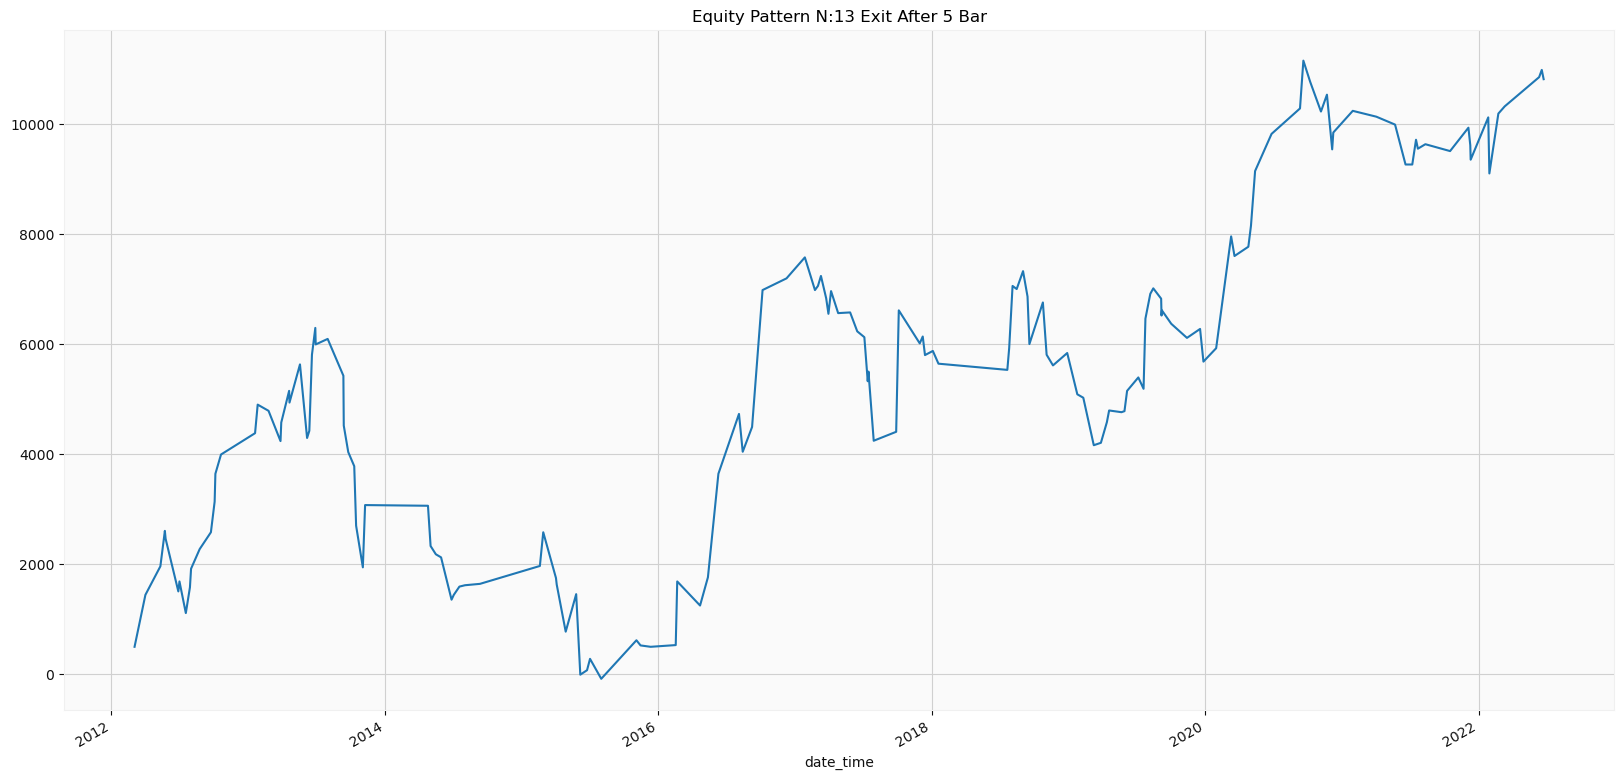

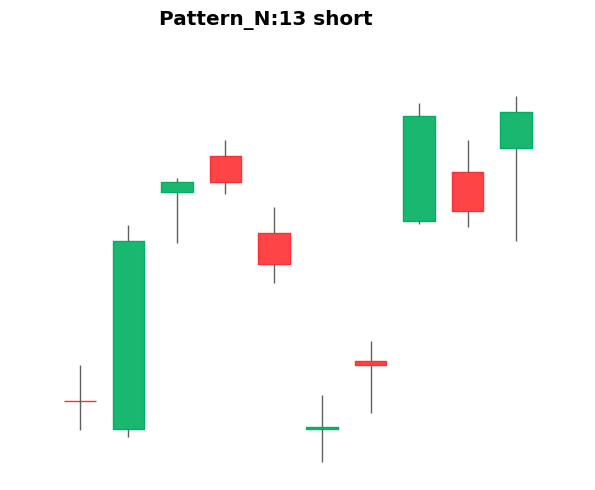

In [30]:
#plot_pattern(n_pattern,exit_after_bar,direction)
plot_pattern(13,2,direzione)

# Retest Pattern con Numba

In [16]:
df_PTN=df_PTN[df_PTN.simbolo==SIMBOLO]

bigdf_PTN=pd.DataFrame()
big_results_PTN=pd.DataFrame()

for e1 in tqdm(range(len(df_PTN))):
    
    pattern_n=df_PTN["Ptn_N°"].iloc[e1]
    n_days=int(df_PTN["Exit"].iloc[e1].split("_")[1])
    
    dataset["signal_PTN"]=generate_signal2(dataset,lookback,pct_accepted,fraction_movement,pattern_n,direzione)

    EXIT_ON_ENTRY_BAR = False
    CONSECUTIVE_TRADES = True

    WRITELOG = False

    NAME = "Tester"

    COSTS_FIXED = costi/2
    # 10 for 10 $ for each transaction (2 * fee each operation)
    COSTS_VARIABLE = 0.0
    # 1.0 for 1% (2 * fee each operation)
    COSTS_PERSHARES = 0.0 
    # 0.01 for 1 cent for each shares traded (2 * fee each operation)

    INSTRUMENT = 2 # 1: equity, 2: future, 3: crypto/forex
    TICK = tick
    BIGPOINTVALUE = bigpointvalue
    DIRECTION = direzione
    ORDER_TYPE = "market"

    QUANTITY = 1
    MARGIN_PERCENT = 20 # margin to use in capital calculation

    MAX_INTRADAY_OPERATIONS = 100

    TIME_EXIT = n_days  # 0 to disable
    TIME_EXIT_LOSS = 0  # 0 to disable
    TIME_EXIT_GAIN = 0  # 0 to disable

    MONEY_STOPLOSS = 0 # 0 to disable
    MONEY_TARGET = 0 # 0 to disable

    MIN_MONEY_PERCENT_STOPLOSS = 0
    PERCENT_STOPLOSS = 0.0  # 0 to disable

    MIN_MONEY_PERCENT_TARGET = 0
    PERCENT_TARGET = 0.0  # 0 to disable

    enter_level = dataset.close.shift(1)

    enter_rules = dataset["signal_PTN"]==1

    exit_rules = False

    exit_rules_loss = False

    exit_rules_gain = False 

    target_level = 0 

    stop_level = 0

    tradelist2, open_equity2, closed_equity2, operation_equity2 = apply_trading_system(dataset, INSTRUMENT, QUANTITY, MARGIN_PERCENT, BIGPOINTVALUE, TICK, DIRECTION,
                                                                               COSTS_FIXED, COSTS_VARIABLE, COSTS_PERSHARES, 
                                                                               ORDER_TYPE, enter_level, enter_rules, MAX_INTRADAY_OPERATIONS, 
                                                                               exit_rules, exit_rules_loss, exit_rules_gain,
                                                                               target_level, stop_level,
                                                                               TIME_EXIT, TIME_EXIT_LOSS, TIME_EXIT_GAIN, 
                                                                               MONEY_STOPLOSS, MONEY_TARGET, 
                                                                               PERCENT_STOPLOSS, MIN_MONEY_PERCENT_STOPLOSS, 
                                                                               PERCENT_TARGET, MIN_MONEY_PERCENT_TARGET, WRITELOG, EXIT_ON_ENTRY_BAR, CONSECUTIVE_TRADES)
    if len(tradelist2) >0:
        tmp=tradelist2.operations.to_frame()
        tmp.columns=([str(pattern_n)+"_"+str(n_days)])
        bigdf_PTN=pd.concat([bigdf_PTN,tmp],axis=1).fillna(0)

        tmp_x=performance_report_gen(tradelist2.operations)
        tmp_x["nome"]=str(pattern_n)
        tmp_x["exit"]=TIME_EXIT
        big_results_PTN=pd.concat([big_results_PTN,tmp_x])

    else:
        tradelist2, open_equity2, closed_equity2, operation_equity2 = apply_trading_system(dataset.iloc[:-1], INSTRUMENT, QUANTITY, MARGIN_PERCENT, BIGPOINTVALUE, TICK, DIRECTION,
                                                                           COSTS_FIXED, COSTS_VARIABLE, COSTS_PERSHARES, 
                                                                           ORDER_TYPE, enter_level, enter_rules, MAX_INTRADAY_OPERATIONS, 
                                                                           exit_rules, exit_rules_loss, exit_rules_gain,
                                                                           target_level, stop_level,
                                                                           TIME_EXIT, TIME_EXIT_LOSS, TIME_EXIT_GAIN, 
                                                                           MONEY_STOPLOSS, MONEY_TARGET, 
                                                                           PERCENT_STOPLOSS, MIN_MONEY_PERCENT_STOPLOSS, 
                                                                           PERCENT_TARGET, MIN_MONEY_PERCENT_TARGET, WRITELOG, EXIT_ON_ENTRY_BAR, CONSECUTIVE_TRADES)
        if len(tradelist2) >0:
            tmp=tradelist2.operations.to_frame()
            tmp.columns=([str(pattern_n)+"_"+str(n_days)])
            bigdf_PTN=pd.concat([bigdf_PTN,tmp],axis=1).fillna(0)

            tmp_x=performance_report_gen(tradelist2.operations)
            tmp_x["nome"]=str(pattern_n)
            tmp_x["exit"]=TIME_EXIT
            big_results_PTN=pd.concat([big_results_PTN,tmp_x])
            

  0%|          | 0/181 [00:00<?, ?it/s]


Elaboration starting at: 2022-11-19 15:16:47.839602
Elaboration completed at: 2022-11-19 15:17:36.685768 in 0:00:48.846166

Consistency check: entries: 47 exits: 47


Elaboration starting at: 2022-11-19 15:17:36.889940
Elaboration completed at: 2022-11-19 15:17:36.891942 in 0:00:00.002002

Consistency check: entries: 138 exits: 138

Last trade still open: we close it on last bar and we compute open position as closed position!


Elaboration starting at: 2022-11-19 15:17:37.082102
Elaboration completed at: 2022-11-19 15:17:37.084103 in 0:00:00.002001

Consistency check: entries: 92 exits: 92


Elaboration starting at: 2022-11-19 15:17:37.276265
Elaboration completed at: 2022-11-19 15:17:37.279268 in 0:00:00.003003

Consistency check: entries: 88 exits: 88


Elaboration starting at: 2022-11-19 15:17:37.490446
Elaboration completed at: 2022-11-19 15:17:37.492448 in 0:00:00.002002

Consistency check: entries: 104 exits: 104


Elaboration starting at: 2022-11-19 15:17:37.682608
Elaboration

# Filtro nuovamente le strategie (piccole differenze tra motore numbe e motore candlestik)

In [17]:
big_results_PTN=big_results_PTN.sort_values(by="Profit",ascending=False)
big_results_PTN=big_results_PTN[(big_results_PTN.Sharpe>=Min_Sharpe)&(big_results_PTN.Operations>=N_min_Operations)]
big_results_PTN["n_in_dataframe"]=big_results_PTN.nome.apply(str)+"_"+big_results_PTN.exit.apply(str)
bigdf_PTN=bigdf_PTN[big_results_PTN["n_in_dataframe"]]
big_results_PTN.tail()

,Profit,MaxDD,Operations,AverageTrade,ProfitFactor,PctWin,Sharpe,Kestner_Ratio,nome,exit,n_in_dataframe
0,1668.75,-4362.50,53,31.49,1.12,50.94,1.09,-0.24,80,1,80_1
0,1650.00,-5125.00,54,30.56,1.08,48.15,0.86,0.14,210,2,210_2
0,1418.75,-6068.75,58,24.46,1.06,51.72,1.05,0.04,180,3,180_3
0,1000.00,-4156.25,75,13.33,1.05,45.33,1.17,0.01,165,1,165_1
0,862.50,-2962.50,53,16.27,1.08,49.06,1.22,0.04,217,1,217_1


# Creo Matrice x Dendrogramma con Drawdown

In [18]:
bigdf_PTN_DD=pd.DataFrame()
for e in tqdm(bigdf_PTN.columns):
    x=drawdown(bigdf_PTN[e])
    bigdf_PTN_DD=pd.concat([bigdf_PTN_DD,x],axis=1)
bigdf_PTN_DD.columns=bigdf_PTN.columns

  0%|          | 0/111 [00:00<?, ?it/s]

# Dendrogramma

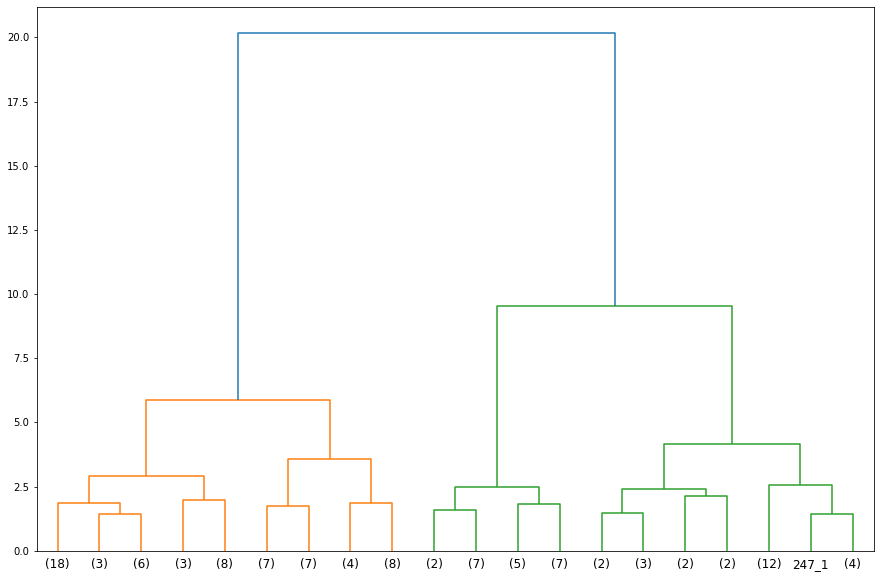


 Cluster 1: N = 18

 Cluster 2: N = 3

 Cluster 3: N = 6

 Cluster 4: N = 3

 Cluster 5: N = 8

 Cluster 6: N = 7

 Cluster 7: N = 7

 Cluster 8: N = 4

 Cluster 9: N = 8

 Cluster 10: N = 2

 Cluster 11: N = 7

 Cluster 12: N = 5

 Cluster 13: N = 7

 Cluster 14: N = 2

 Cluster 15: N = 3

 Cluster 16: N = 2

 Cluster 17: N = 2

 Cluster 18: N = 12

 Cluster 19: N = 4

 Cluster 20: N = 1


In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import ward, fcluster


Z= bigdf_PTN_DD.corr()  ################  bigdf_PTN_DD sul drawdown oppure bigdf_PTN sulle operazioni

Zlista = Z.index.values.tolist()

linked = linkage(Z, 'ward')

labelList = Zlista

level = 20 ######### numero di cluster 

plt.figure(figsize=(15, 10))
dendro=dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='Ascending',
            truncate_mode='lastp', 
            show_leaf_counts=True,
            p=level)
plt.show()


label = fcluster(linked, level, criterion='maxclust')

df_clst = pd.DataFrame()
df_clst["index"]  = Z.index
df_clst['label']  = label

LS=[]
for i in range(level):
    elements = df_clst[df_clst['label']==i+1]['index'].tolist()  
    size = len(elements)
    print('\n Cluster {}: N = {}'.format(i+1, size))
    LS.append(elements)

# Check Skew e %win (!!! solo visivo non c'è scelta!!!)

In [20]:
from scipy.stats import kurtosis, skew
from tqdm.notebook import tqdm

for idn in tqdm(range(len(LS))):
    x=bigdf_PTN[LS[idn]]
    print("Cluster",idn)
    for k in x.columns:
        print(k)
        g=x[k]
        g=g[g!=0].dropna()
        print("skew",round(skew(g.values),2),"    Win%",percent_win(g))
    print("")

  0%|          | 0/20 [00:00<?, ?it/s]

Cluster 0
187_3
skew 1.05     Win% 46.38
234_3
skew -0.52     Win% 66.67
162_1
skew 0.54     Win% 52.73
115_1
skew 0.66     Win% 51.0
115_2
skew 0.18     Win% 51.09
233_3
skew 0.51     Win% 55.17
265_3
skew 0.02     Win% 54.23
48_3
skew 1.0     Win% 50.0
79_3
skew 1.19     Win% 46.0
86_3
skew 0.39     Win% 55.56
240_1
skew 0.6     Win% 47.06
271_3
skew 0.16     Win% 45.59
267_1
skew 0.35     Win% 52.07
275_2
skew 0.14     Win% 48.84
30_1
skew 0.78     Win% 50.0
191_1
skew 0.23     Win% 51.02
161_2
skew -0.26     Win% 52.0
81_2
skew 0.71     Win% 41.07

Cluster 1
97_1
skew 0.63     Win% 52.71
174_1
skew -1.09     Win% 53.85
116_1
skew 0.29     Win% 47.58

Cluster 2
50_3
skew -0.02     Win% 65.96
85_3
skew 0.31     Win% 49.41
187_2
skew 0.02     Win% 54.86
235_2
skew 0.08     Win% 51.16
80_3
skew 1.19     Win% 52.94
208_2
skew 0.49     Win% 50.59

Cluster 3
217_2
skew 0.15     Win% 64.71
217_3
skew -0.16     Win% 60.0
217_1
skew -0.17     Win% 49.06

Cluster 4
203_1
skew 0.77     Win% 51

# Selezione della strategia migliore per ramo

In [21]:
ok=[]
ok2=[]
for idn in tqdm(range(len(LS))):
    v_max=[]
    x=bigdf_PTN[LS[idn]]
    if len(x.columns)>0:
        for k in x.columns:
            g=bigdf_PTN[k]
            g=g.where(g!=0).dropna()
            p=profit_factor(g)
            k=kestner_ratio(g)
            c=calmar_ratio(g)
            sr=old_sharpe_ratio(g)
            m_var=-np.var(g)
            g=(p+k+c)*len(g)*g.sum()
            
            v_max.append(k) ######## qui metti cosa vuoi valutare
            
        if len(v_max)>0:
            r=v_max.index(max(v_max))
            ok2.append(max(v_max))
            ok.append(x.iloc[:,r].name)

  0%|          | 0/20 [00:00<?, ?it/s]

# Matrice di correlazione

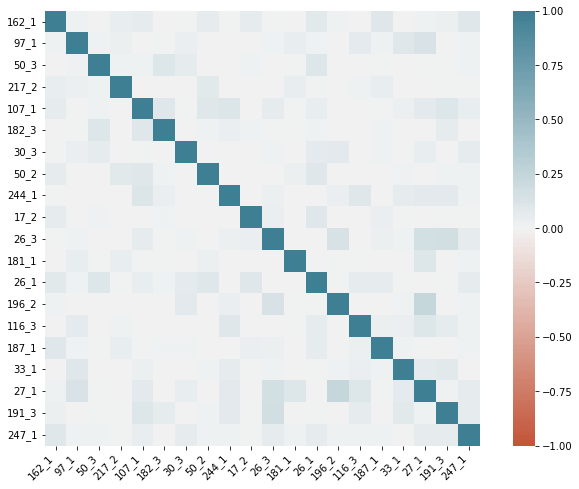

,162_1,97_1,50_3,217_2,107_1,182_3,30_3,50_2,244_1,17_2,26_3,181_1,26_1,196_2,116_3,187_1,33_1,27_1,191_3,247_1
162_1,1.000000,0.009110,-0.002903,0.044693,0.051190,-0.000497,0.003588,0.054913,0.004626,0.051535,0.000112,-0.001047,0.084087,0.010910,-0.004600,0.096266,-0.000590,0.012089,0.024425,0.096816
97_1,0.009110,1.000000,0.011156,0.023843,-0.000504,0.006642,0.033344,-0.001204,-0.001010,-0.000572,0.008310,0.040500,0.008476,-0.000286,0.069321,0.023101,0.097123,0.122044,-0.000717,0.017670
50_3,-0.002903,0.011156,1.000000,0.017568,0.010140,0.108661,0.054507,-0.002117,-0.004193,0.019018,-0.001406,0.002547,0.108097,-0.000932,-0.000584,0.002186,-0.000874,0.005730,0.004121,0.014334
217_2,0.044693,0.023843,0.017568,1.000000,-0.000307,-0.000443,-0.000119,0.080194,-0.000616,-0.000349,-0.000488,0.045023,0.006892,-0.000324,0.009307,0.043633,-0.000014,-0.000544,0.002620,0.005039
107_1,0.051190,-0.000504,0.010140,-0.000307,1.000000,0.096737,0.000909,0.088209,0.111691,-0.001914,0.058797,0.006345,0.042391,-0.001402,-0.001175,0.000625,0.027157,0.077988,0.102643,0.043284
182_3,-0.000497,0.006642,0.108661,-0.000443,0.096737,1.000000,-0.000155,0.012098,0.036454,0.022893,0.001334,0.001518,0.010809,-0.000422,-0.000265,0.014567,-0.000396,-0.005925,0.047538,-0.000112
30_3,0.003588,0.033344,0.054507,-0.000119,0.000909,-0.000155,1.000000,-0.000257,-0.001385,-0.000122,0.013646,-0.000188,0.066375,0.073533,-0.000071,0.008587,-0.000106,0.043928,-0.000153,0.059062
50_2,0.054913,-0.001204,-0.002117,0.080194,0.088209,0.012098,-0.000257,1.000000,-0.001335,-0.000756,-0.001058,0.025955,0.089476,-0.000701,-0.000440,-0.000515,0.008079,-0.001178,0.009421,0.011192
244_1,0.004626,-0.001010,-0.004193,-0.000616,0.111691,0.036454,-0.001385,-0.001335,1.000000,-0.000634,0.028406,-0.000327,-0.001450,0.036813,0.086739,-0.000432,0.055813,0.073296,0.075556,0.009024
17_2,0.051535,-0.000572,0.019018,-0.000349,-0.001914,0.022893,-0.000122,-0.000756,-0.000634,1.000000,0.034976,-0.000554,0.090725,-0.000297,-0.000209,0.038671,0.005147,-0.002142,0.005500,0.003009


In [23]:
import matplotlib.pyplot as plt

corr=bigdf_PTN[ok].corr()

import seaborn as sns
%matplotlib inline
plt.figure(figsize=[12,8])
# plot the heatmap
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

plt.show()

corr

<AxesSubplot:>

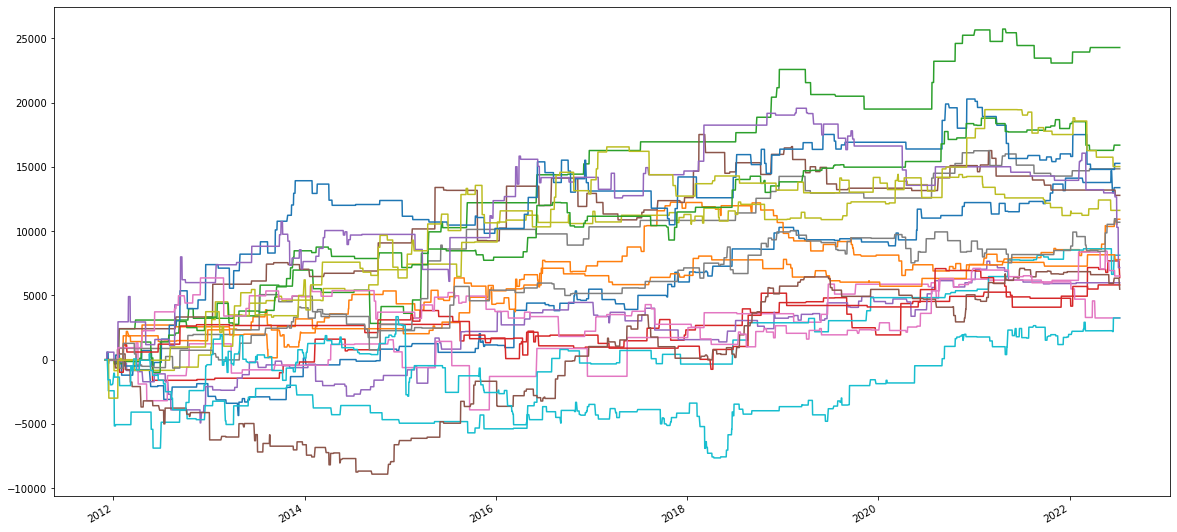

In [24]:
bigdf_PTN[ok].cumsum().plot(legend=None,figsize=(20,10))

<AxesSubplot:>

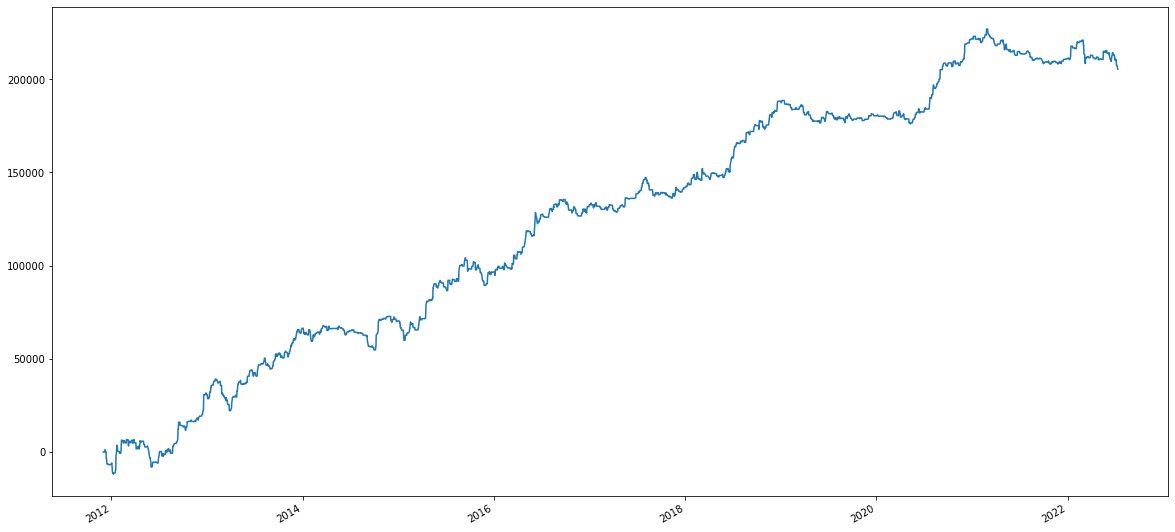

In [25]:
bigdf_PTN[ok].sum(axis=1).cumsum().plot(legend=None,figsize=(20,10))

*************************************************************************
*** Performance Report Fast - Copyright 2020 - by Gandalf Project R&D ***
*************************************************************************

Compound Annual Growth Rate CAGR: 9.75 (capital = 100000)
Annual Return: 17.11 (capital = 100000)

Calmar Ratio (yearly): 1.93
Sharpe Ratio: 0.78 (capital = 100000, risk free rate = 0)
Sortino Ratio: 1.42 (capital = 100000, risk free rate = 0.0)
Omega Ratio: 1.14 (threshold = 100)
Kestner Ratio: 0.5

Profit:                   205331
Operations:               1312
Average Trade:            156.5

Profit Factor:            1.43
Gross Profit:             688175.0
Gross Loss:               -482843.75

Percent Winning Trades:   53.43
Percent Losing Trades:    46.57
Reward Risk Ratio:        1.24

Max Gain:                 8450.0  in date  2012-12-19 00:00:00
Average Gain:             981.7
Max Loss:                 -5400.0  in date  2015-01-23 00:00:00
Average Loss:      

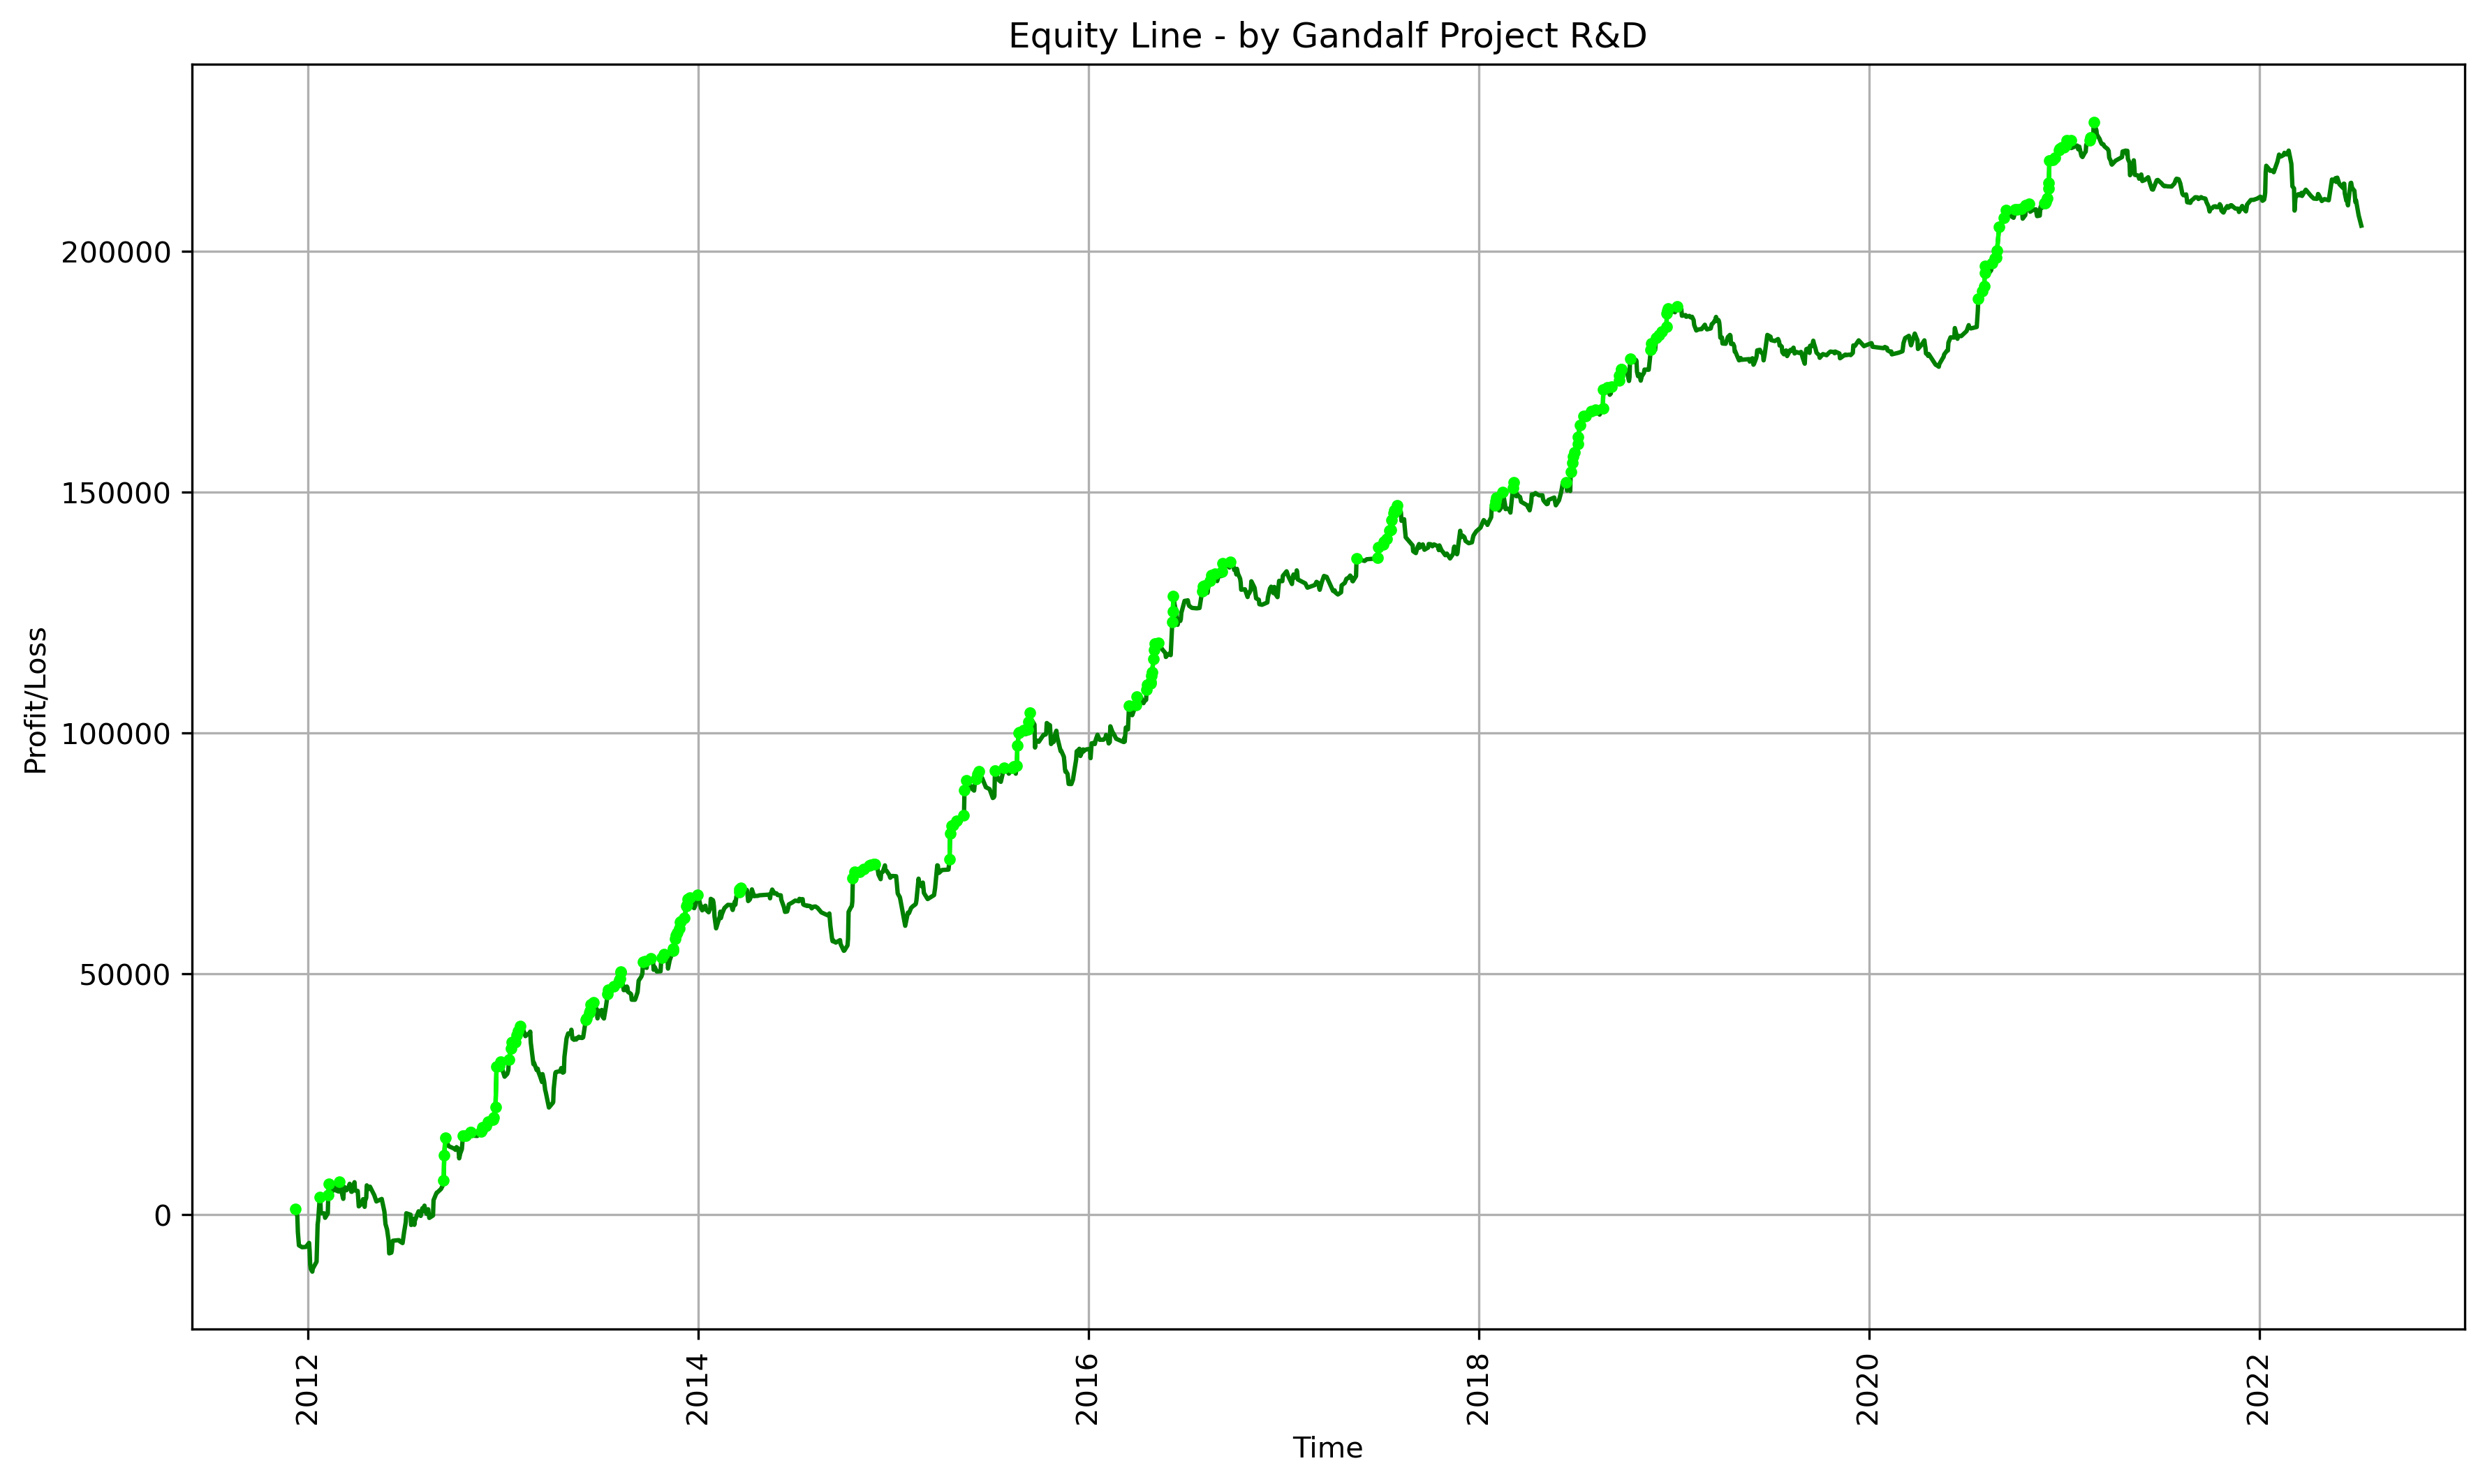

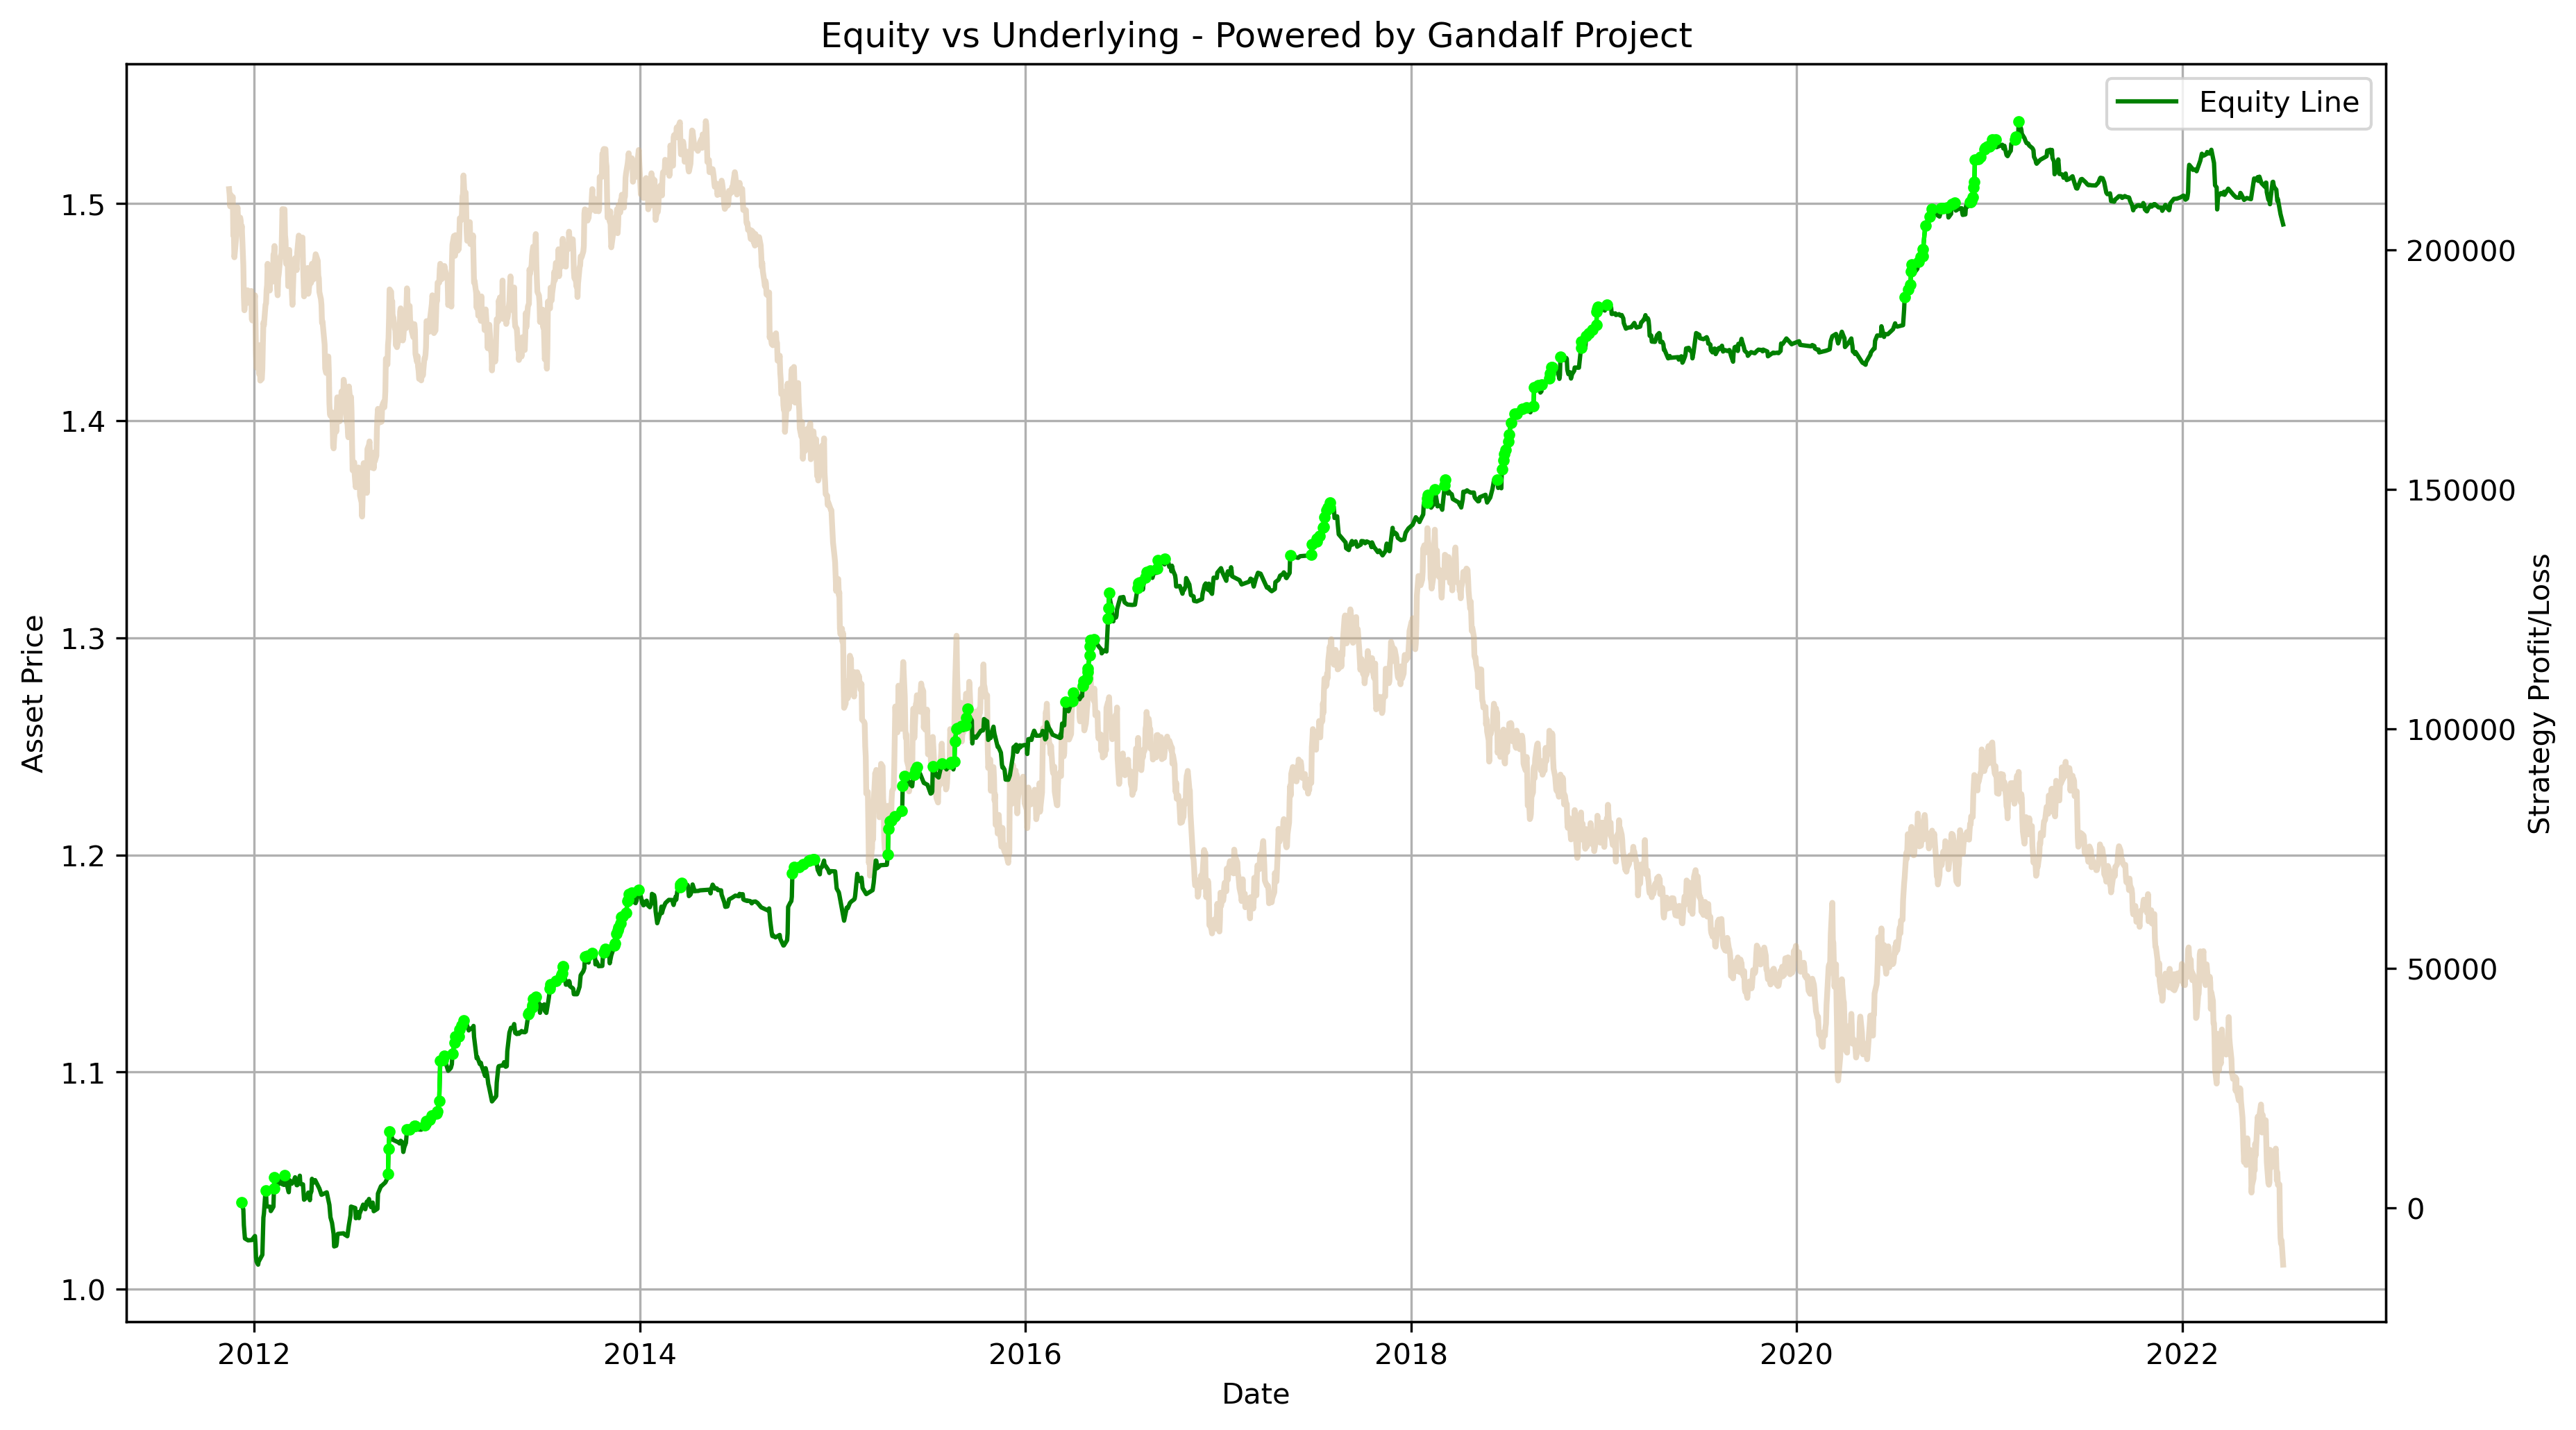

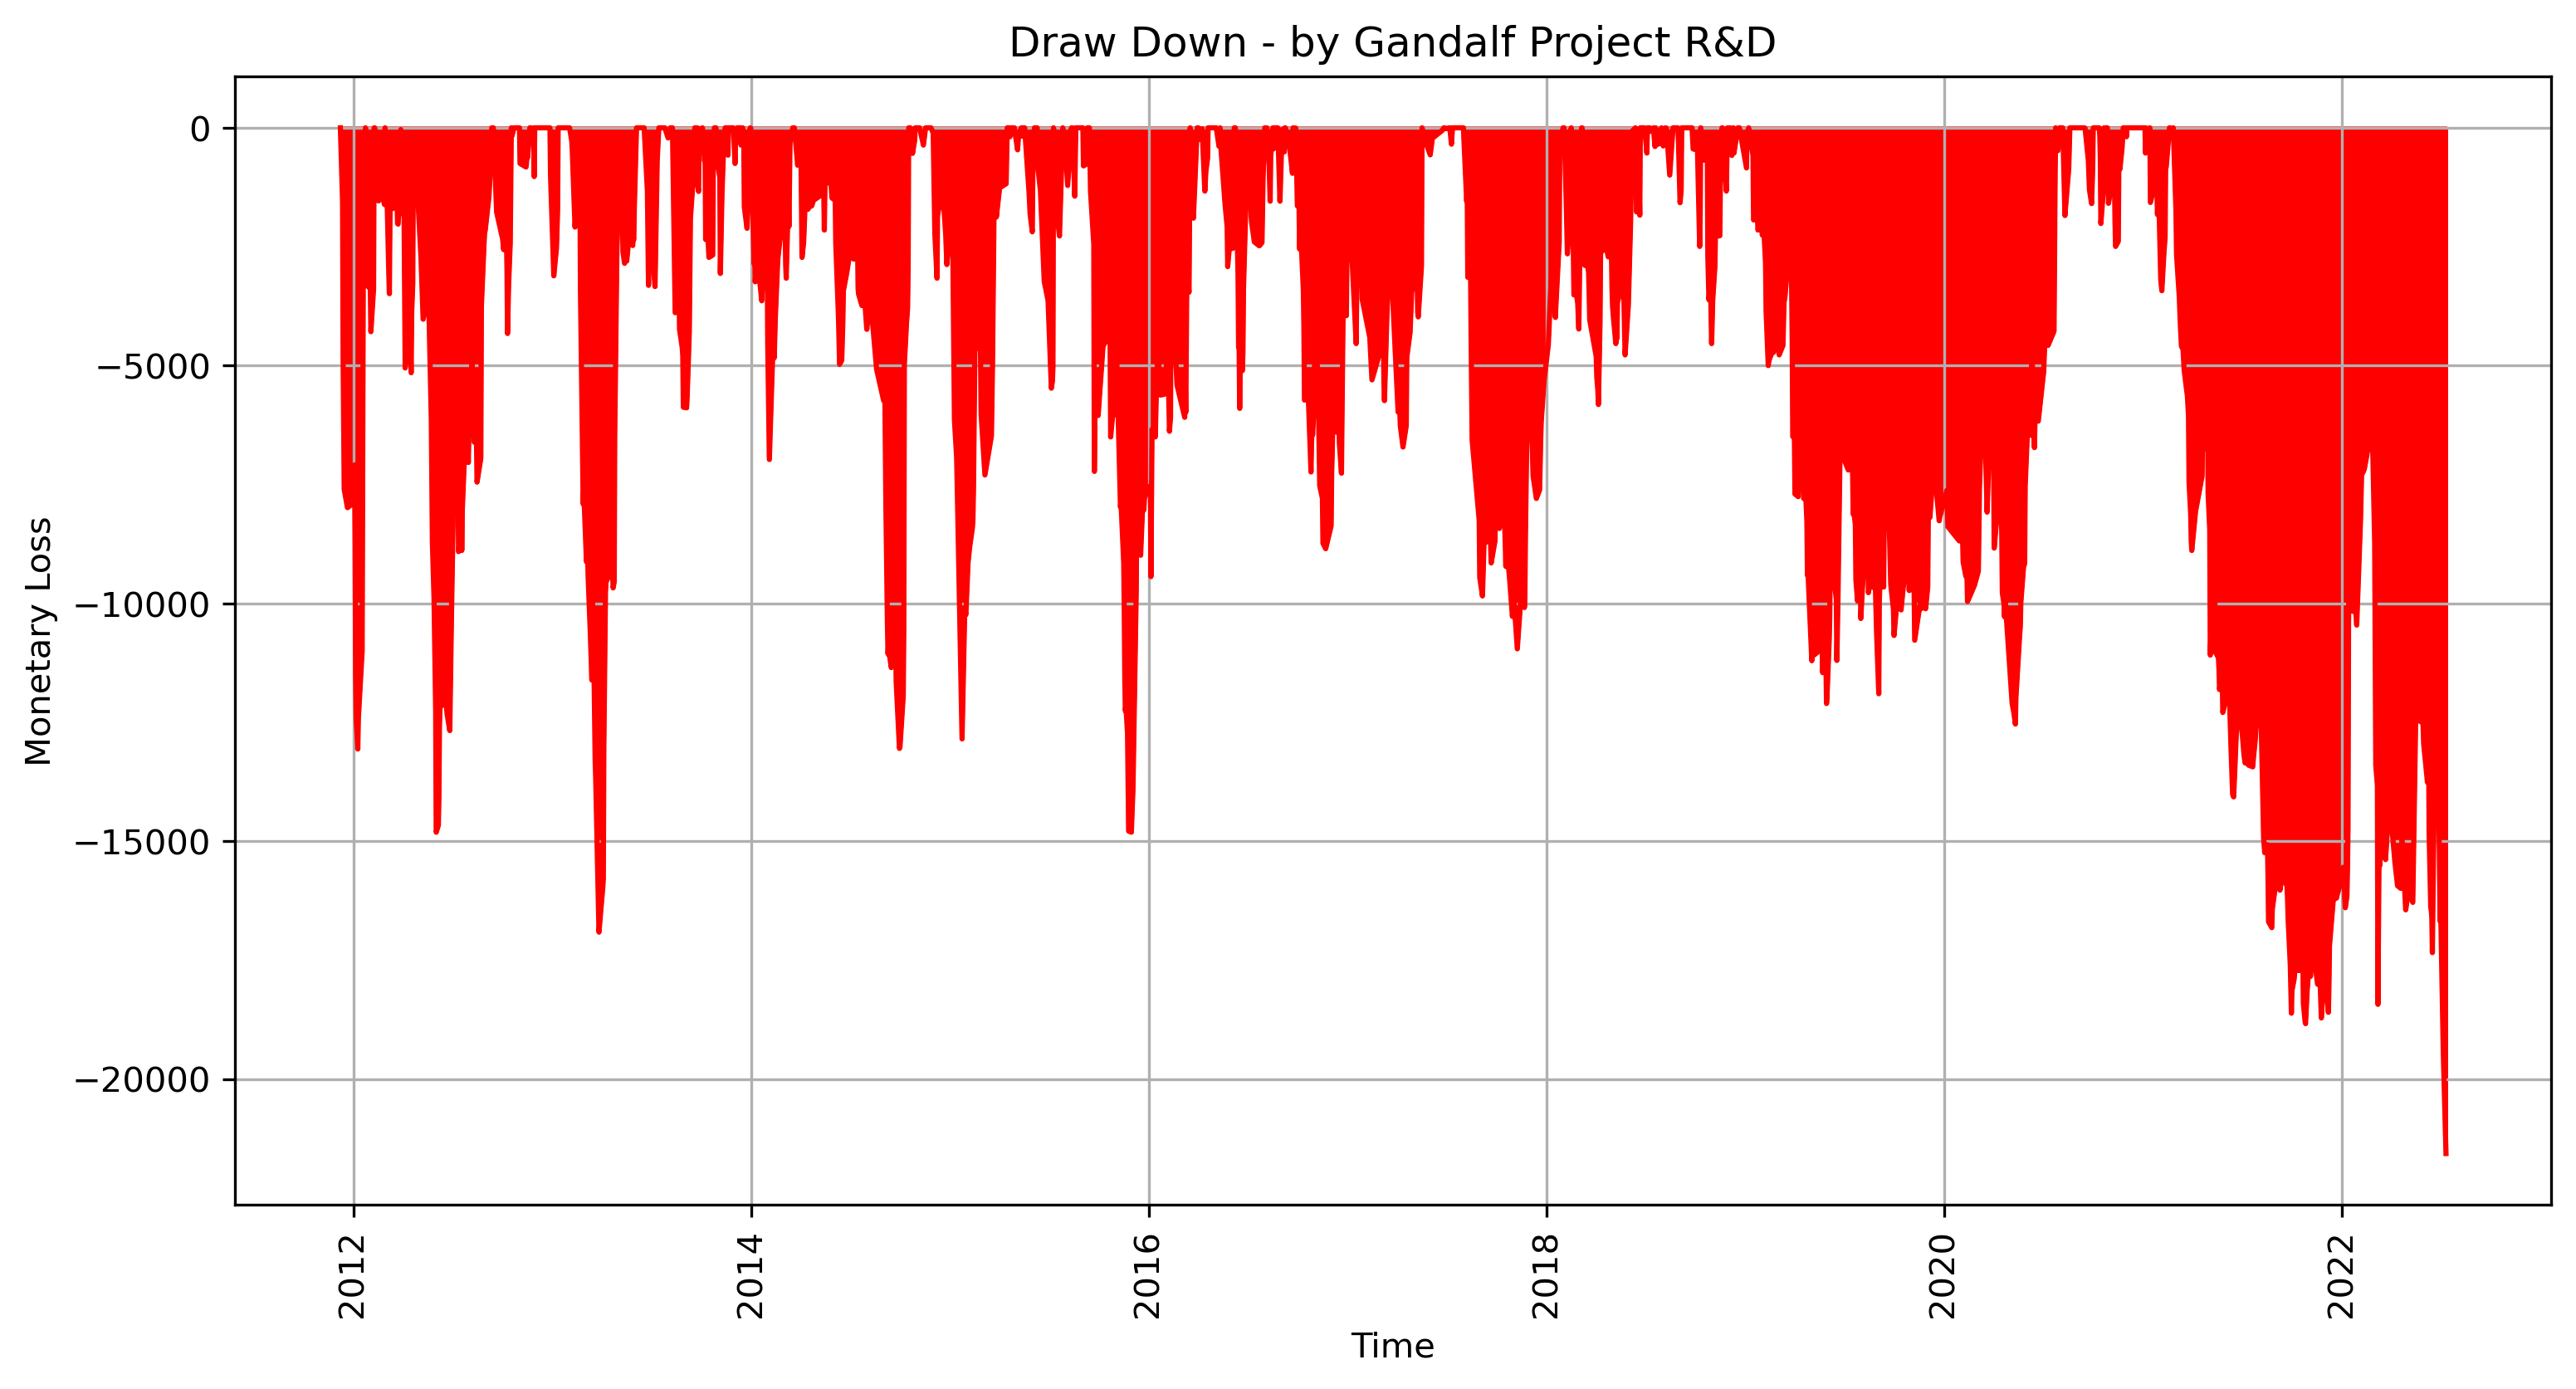

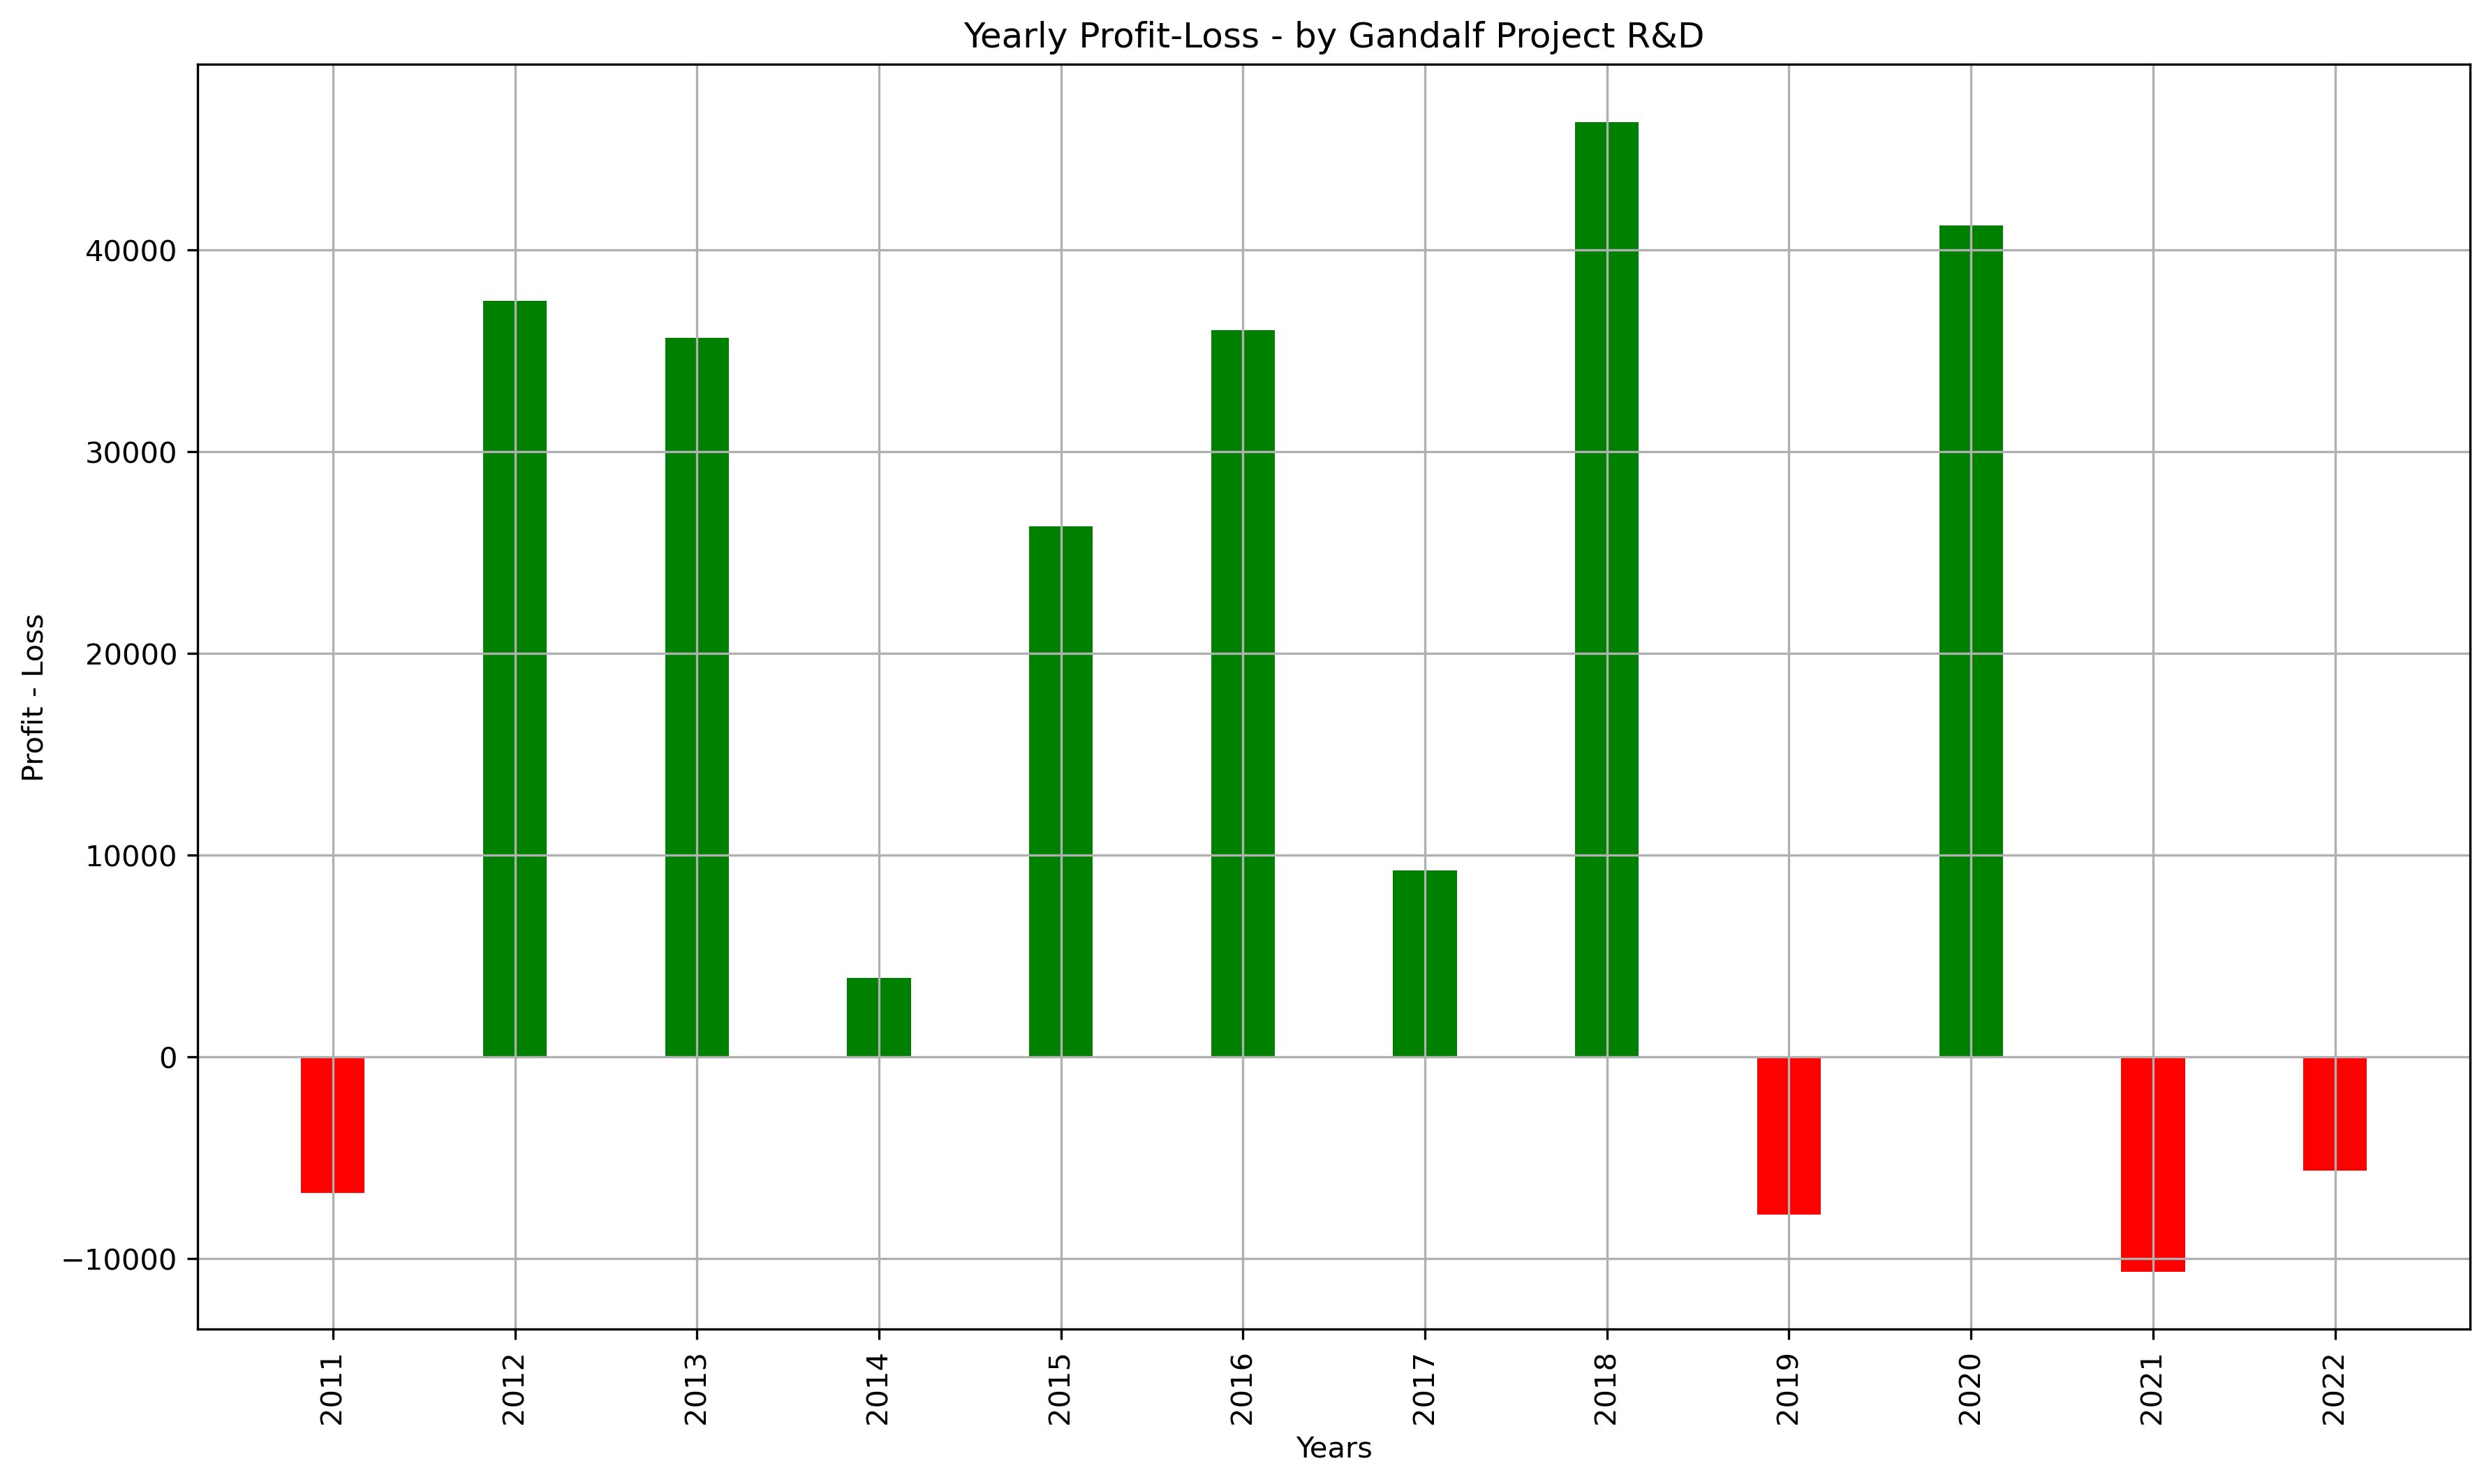

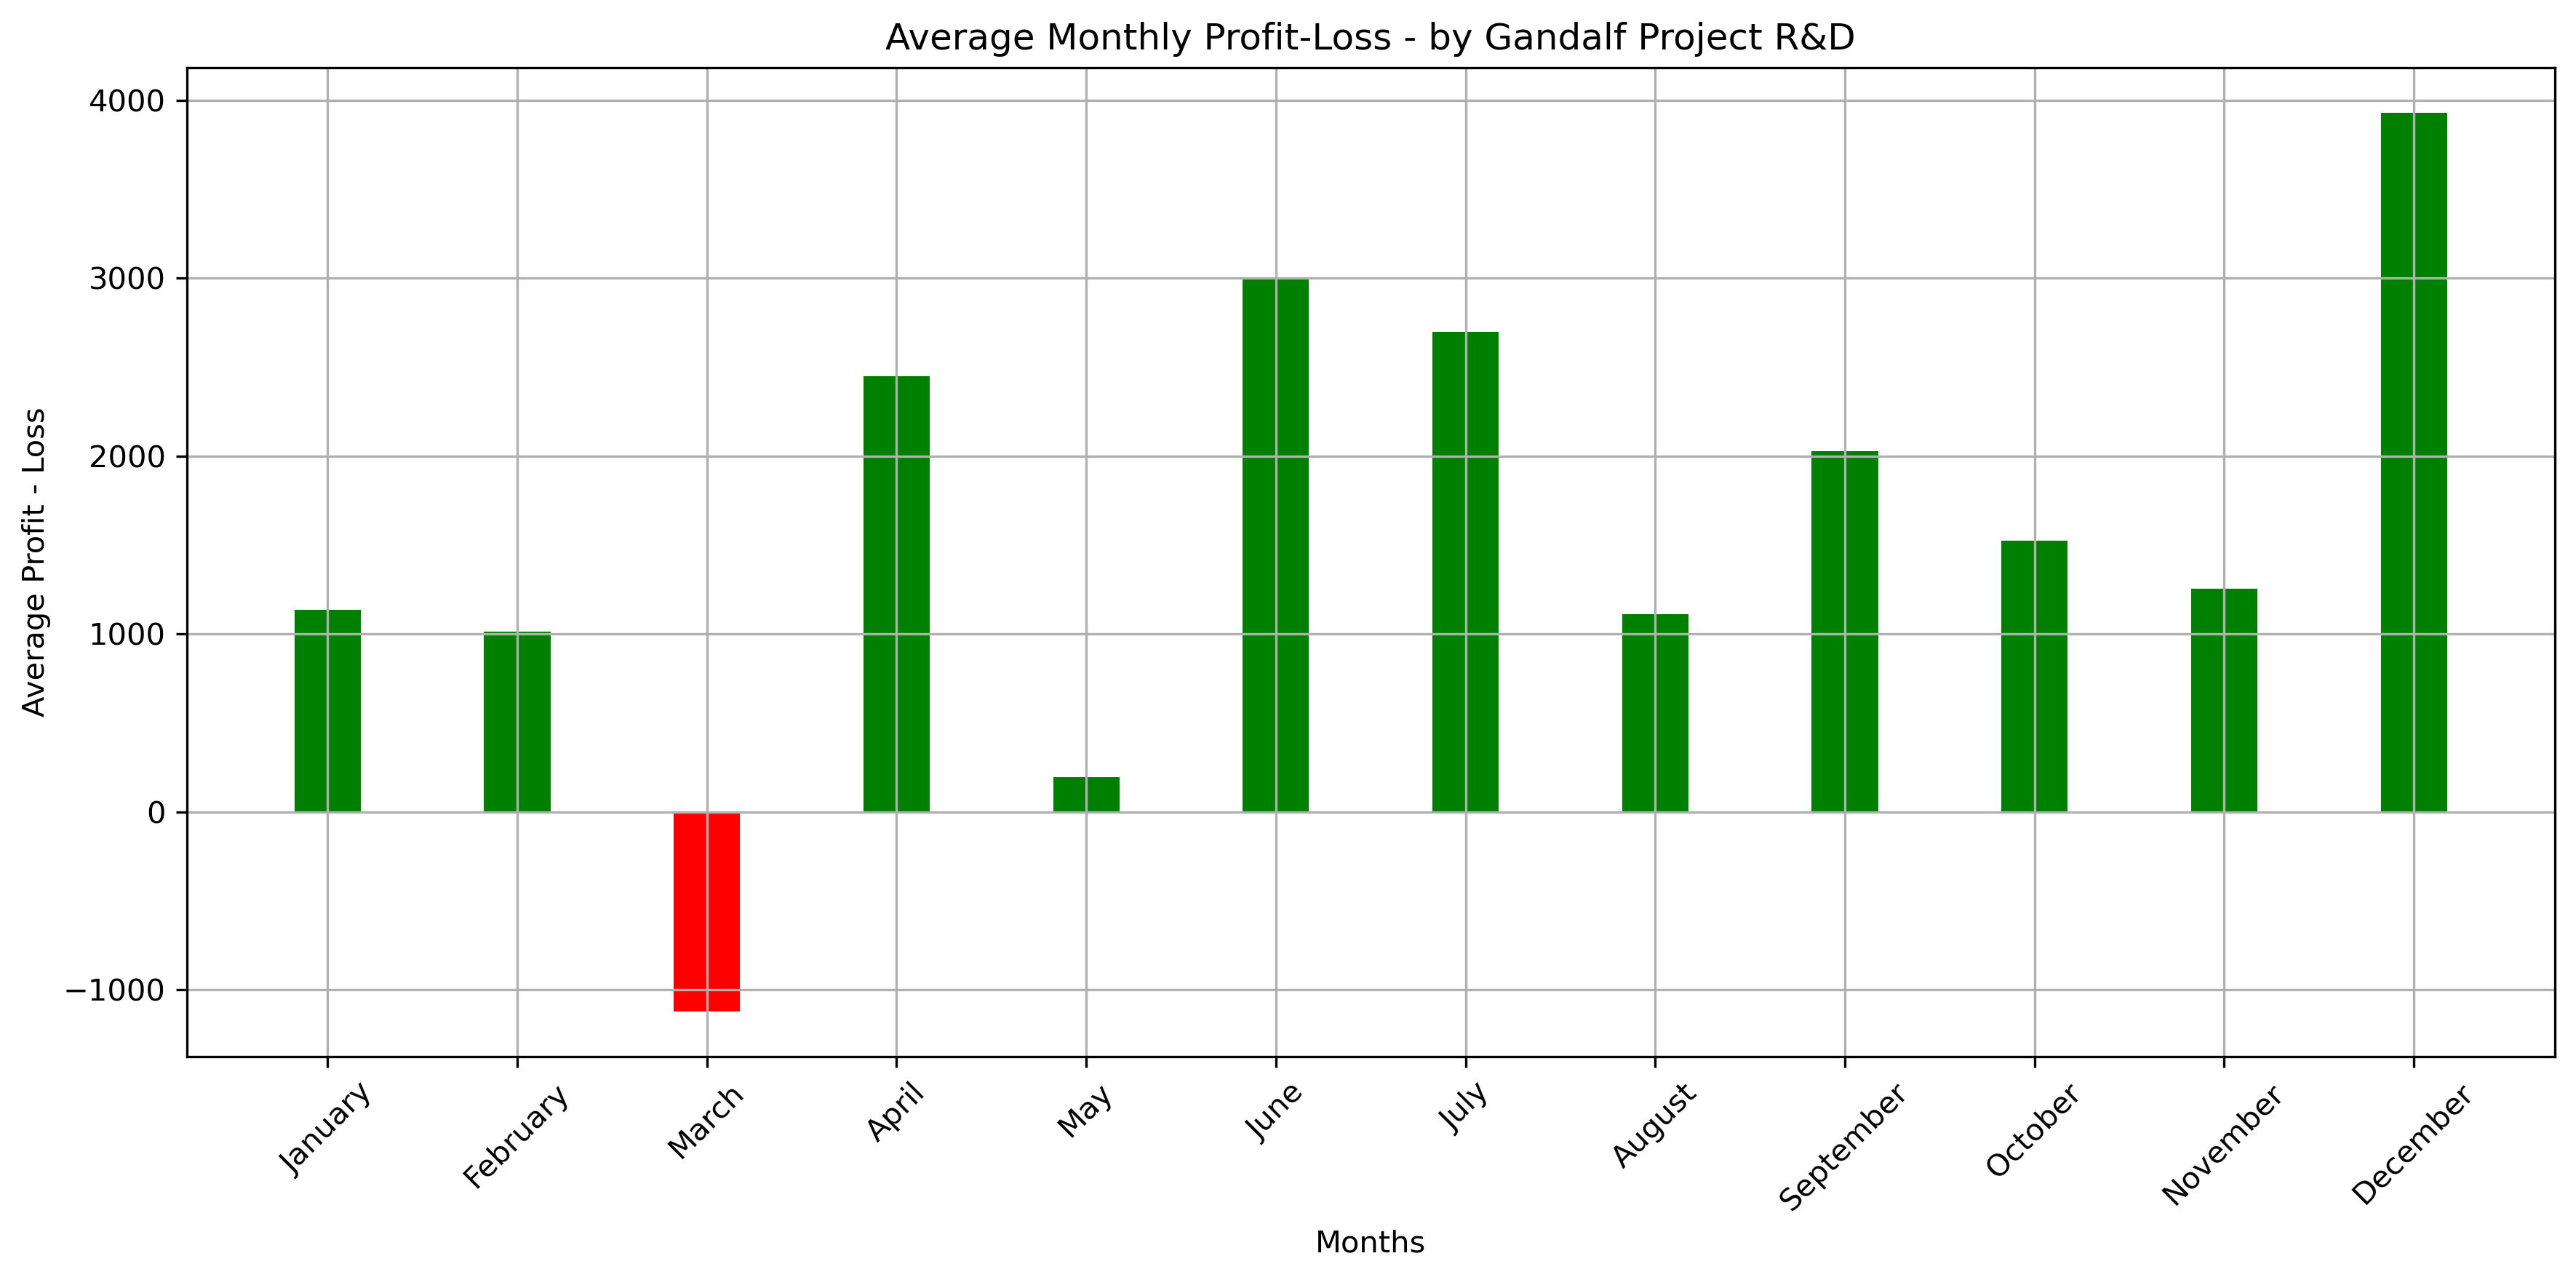

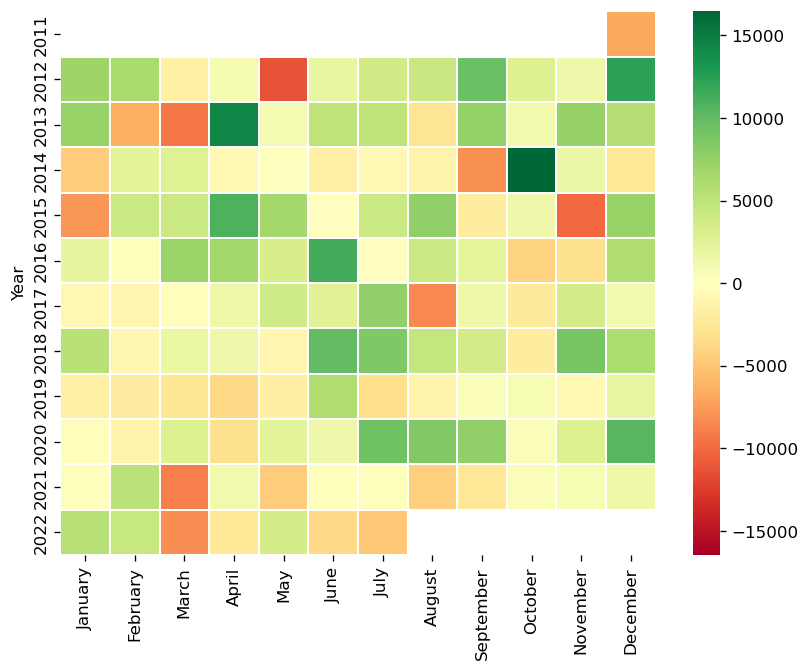

In [26]:
tradelist=bigdf_PTN[ok].sum(axis=1).to_frame()
tradelist=tradelist.where(tradelist!=0).dropna()
tradelist.columns=(["operations"])
performance_report_fast(tradelist,100000,0,False)

# Salvataggio portafoglio

In [27]:
csv_export=pd.DataFrame()

for k in ok:
    
    PTN = int(k.split("_")[0])
    EXT = int(k.split("_")[1])
    
    if direzione == "long":
        pattern=[list(up_ls[PTN][0]) , list(up_ls[PTN][1])]
        
    if direzione == "short":
        pattern=[list(down_ls[PTN][0]) , list(down_ls[PTN][1])]
        
    exit_bar=EXT
    add_info=[pct_accepted,lookback,fraction_movement]
    
    info=pd.DataFrame([bigpointvalue,tick,SIMBOLO,utc_offset,type_session,"60min",IS,OOS,str(custom_session_start),str(custom_session_stop),costi,direzione,"market",pattern,exit_bar,"candle",add_info]).T
    csv_export=pd.concat([csv_export,info])

csv_export.columns=(["bigpointvalue","tick","file_name","uct_offset","type_session","resample_tf","start_date","end_date","custom_session_start","custom_session_stop","costi","direzione","tipo_ordine","entry_rules","exit_bars","level","ADD_RULE_CONDITION"])

import os
os.chdir(r"C:\Users\Drako\Genetico_V3\Strategie_LS")

import uuid

idz = uuid.uuid1()
save_as = SIMBOLO+"_CandleStick_Daily_"+str(idz)+".csv"

csv_export.to_csv(save_as)